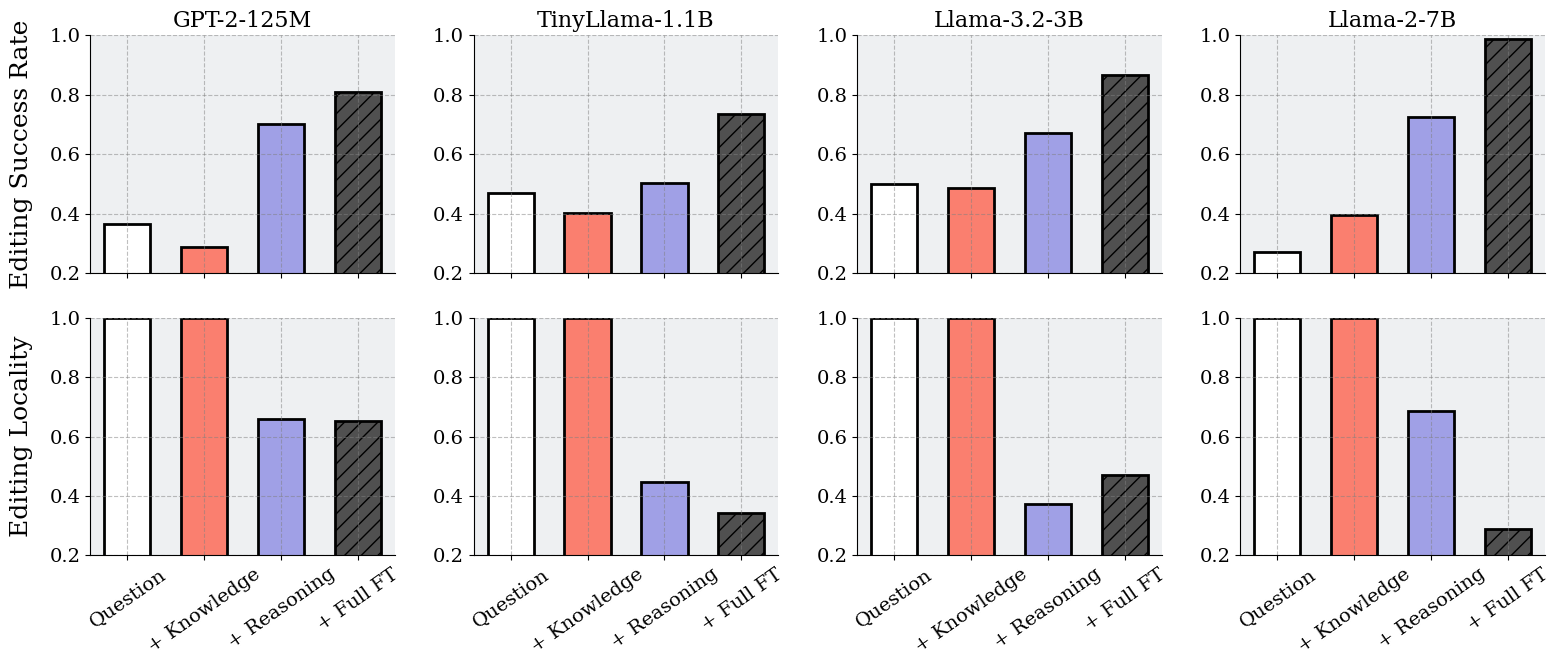

In [ ]:
import glob, json, re, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import rcParams

# -- Styling ---------------------------------------------------------------
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.facecolor'] = '#EEF0F2'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.5

# -- Dummy data: eight (s1, s2) pairs, each with four ACC values ---------------
# (In practice, replace these with your actual eight sets of values.)
s1s = [
    [0.364, 0.286, 0.701, 0.808],
    [0.47, 0.403, 0.503, 0.734],
    [0.499, 0.487, 0.671, 0.867],
    [0.27, 0.395, 0.726, 0.986],
    [1, 1, 0.661, 0.654],
    [1, 1, 0.446, 0.344],
    [1, 1, 0.372, 0.472],
    [1, 1, 0.687, 0.29],
]

colors = [
    (1, 1, 1),
    (250 / 255.0, 127 / 255.0, 111 / 255.0),
    (160 / 255, 160 / 255, 230 / 255),
    (80 / 255, 80 / 255, 80 / 255),
]

cot_ids = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
bar_w = 0.6
x = np.arange(len(cot_ids))

# Model names for columns (left to right)
model_names = ['GPT-2-125M', 'TinyLlama-1.1B', 'Llama-3.2-3B', 'Llama-2-7B']

# -- Create 2×4 grid of subplots -------------------------------------------
fig, axs = plt.subplots(2, 4, figsize=(16, 7), squeeze=False)

for idx in range(8):
    row = idx // 4
    col = idx % 4
    ax = axs[row, col]

    s1 = s1s[idx]

    # Plot bars for s1
    ax.bar(x[0], s1[0], width=bar_w, color=colors[0], edgecolor='black', linewidth=2)
    ax.bar(x[1], s1[1], width=bar_w, color=colors[1], edgecolor='black', linewidth=2)
    ax.bar(x[2], s1[2], width=bar_w, color=colors[2], edgecolor='black', linewidth=2)
    ax.bar(x[3], s1[3], width=bar_w, color=colors[3], edgecolor='black', linewidth=2, hatch='//')

    ax.set_ylim(0.2, 1.0)
    ax.set_xticks(x)
#     if row == 1:
    ax.set_xticklabels(cot_ids, rotation=35, fontsize=14)
#     else:
#         ax.set_xticklabels([])
    
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='both', labelsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add column titles in the first row
    if row == 0:
        ax.set_title(model_names[col], fontsize=16)

# Add row labels on the left side
axs[0, 0].set_ylabel("Editing Success Rate", rotation=90, fontsize=18, labelpad=12)
axs[1, 0].set_ylabel("Editing Locality", rotation=90, fontsize=18, labelpad=12)

fig.tight_layout()
plt.savefig('figures/2x4_subplots.pdf', dpi=600, bbox_inches='tight')
plt.show()

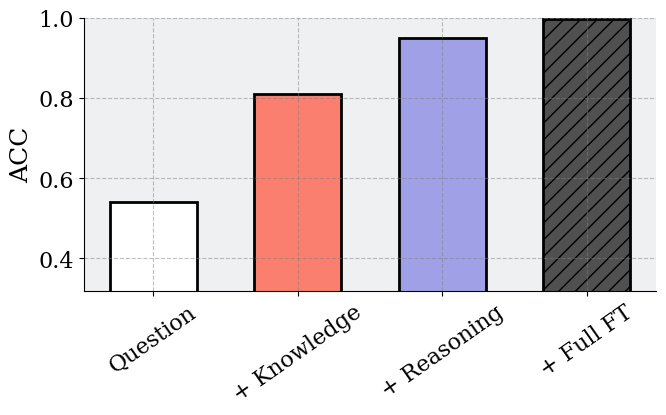

Figure saved to figures/arc_mistral7b.pdf


In [19]:

import glob, json, re, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import rcParams

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.facecolor'] = '#EEF0F2'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.5



fig, axs = plt.subplots(1, 1, figsize=(7, 4.5), squeeze=False)
bar_w = 0.6
colors = [(1,1,1), (250/255.0, 127/255.0, 111/255.0), (160/255,160/255,230/255), (80/255,80/255,80/255)]
# white

s1s = [[0.540, 0.810, 0.948, 0.997],
        [0.55, 0.57, 0.61, 0.55]]
s2s = [[0.53, 0.52, 0.64, 0.51],
        [0.52,0.57,0.65,0.52,]]

for row in range(1):
    cot_ids = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
    s1 = s1s[row]
    s2 = s2s[row]
    x = np.arange(len(cot_ids))

    ax1 = axs[row,0]
    ax1.bar(x[0], s1[0], width=bar_w, color=colors[0], edgecolor='black', linewidth=2)
    ax1.bar(x[1], s1[1], width=bar_w, color=colors[1], edgecolor='black', linewidth=2)
    ax1.bar(x[2], s1[2], width=bar_w, color=colors[2], edgecolor='black', linewidth=2)
    ax1.bar(x[3], s1[3], width=bar_w, color=colors[3], edgecolor='black', linewidth=2, hatch='//')
    # ax1.set_title(f'{name} – student‑1', fontsize=14)
    ax1.set_ylabel('ACC')
    ax1.set_xticks(x)
    ax1.set_xticklabels(cot_ids, rotation=35, fontsize=16)
    # yticks fontsize
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_ylim(0.32,1.0)
    # if row == 0:
    #     ax1.set_xlabel('Training Type', fontsize=16)
    # else:
    #     ax1.set_xlabel('(c) ARC + Mistral 7B', fontsize=16)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='both', labelsize=16)

plt.tight_layout()
# pdf
out_fig = 'figures/arc_mistral7b.pdf'
plt.savefig(out_fig, dpi=600, bbox_inches='tight')
plt.show()
print(f'Figure saved to {out_fig}')